In [1]:
import pandas as pd
import numpy as np

from catboost import CatBoostRegressor
from catboost import Pool

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl as opx
from plotly.subplots import make_subplots

from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

In [2]:
raw_data = pd.read_excel("Raw_data.xlsx")
raw_data.shape

(185, 15)

In [3]:
add_data = pd.read_excel('test_new.xlsx')
add_data.shape

(27, 15)

In [4]:
add_data.columns = raw_data.columns
data = pd.concat([raw_data,add_data],axis = 0,ignore_index=True)
data.shape

(212, 15)

In [5]:
karay_data = pd.read_excel('Dataset_Karay.xlsx')
karay_data.columns = data.columns

data = pd.concat([data,karay_data],axis = 0,ignore_index=True)
print(data.shape)
data.head()

(248, 15)


,L,N,H_pay,Р_res,Perm,Visc,Az,M_prop,X_f,Height,Width,P_bh,dP,WLPR,WOPR
0,720.0,5,2.0,350,1.75,0.839,134.59,69.7,186.60,36.500,3.9000,65.0,285.0,55.159,51.655
1,700.0,5,4.0,360,0.60,0.730,229.38,60.8,121.70,38.240,4.0900,0.0,360.0,131.849,94.091
2,660.0,5,1.4,345,1.80,0.730,329.33,50.0,142.00,29.000,5.0000,65.0,280.0,39.957,24.563
3,650.0,5,1.9,335,2.00,0.700,307.70,50.0,133.36,40.339,2.6761,65.0,270.0,52.428,44.103
4,675.0,5,1.5,325,1.50,0.730,154.51,50.0,161.10,38.764,3.4000,65.0,260.0,57.533,44.581


In [6]:
data = data.dropna().sample(frac=1).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       248 non-null    float64
 1   N       248 non-null    int64  
 2   H_pay   248 non-null    float64
 3   Р_res   248 non-null    int64  
 4   Perm    248 non-null    float64
 5   Visc    248 non-null    float64
 6   Az      248 non-null    float64
 7   M_prop  248 non-null    float64
 8   X_f     248 non-null    float64
 9   Height  248 non-null    float64
 10  Width   248 non-null    float64
 11  P_bh    248 non-null    float64
 12  dP      248 non-null    float64
 13  WLPR    248 non-null    float64
 14  WOPR    248 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 29.2 KB


In [7]:
data = data.drop('WOPR', axis = 1)
data.shape

(248, 14)

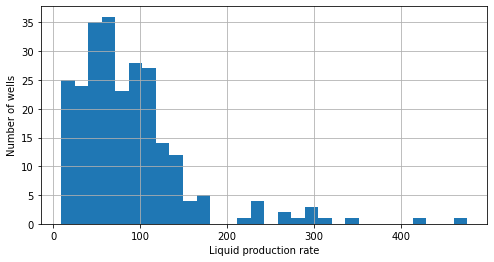

In [8]:
plt.figure(figsize = (8, 4))
plt.xlabel("Liquid production rate")
plt.ylabel("Number of wells")
data['WLPR'].hist(bins=30);

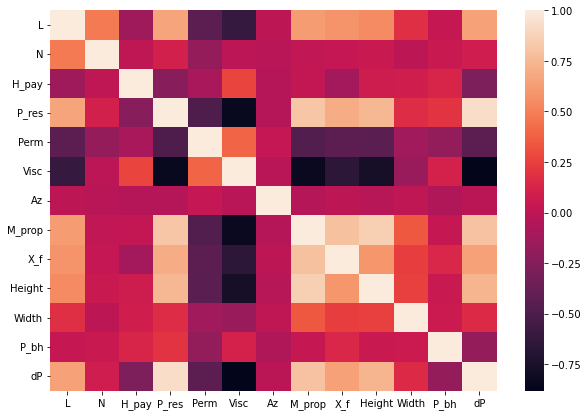

In [9]:
plt.figure(figsize = (10, 7))
sns.heatmap(data.drop('WLPR', axis = 1).corr());

In [10]:
random_state = 10

In [11]:
X, y = data.drop('WLPR', axis = 1).values, data['WLPR'].values

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.02487563,  1.82345171,  0.65291857, ..., -0.33857431,
        -2.36414339, -1.41728334],
       [ 0.73991029, -0.02421335,  2.96677689, ..., -0.26331401,
        -1.10397268, -0.27241768],
       [-1.08783846, -0.94804589, -0.27262476, ..., -0.45146477,
         0.36127934, -0.92215168],
       ...,
       [ 1.23773398, -0.02421335, -0.61970351, ...,  0.25635842,
         0.19937304,  2.28104704],
       [-0.87054229, -0.94804589,  2.96677689, ..., -0.03753308,
         1.0898577 , -0.48764838],
       [ 1.47140394, -0.02421335, -1.19816809, ...,  0.56180237,
        -0.61015846,  1.10889861]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

In [15]:
X_train.shape,  X_test.shape, X_val.shape

((158, 13), (50, 13), (40, 13))

In [32]:
model = CatBoostRegressor(verbose=False)
grid = {'depth':[1,2,4,6],
        'iterations':[1000,2000],
        'learning_rate':[.05,.08,.1,.15,.2,.3,.5], 
        'l2_leaf_reg':[1,2,4,6,8]}

grid_search_result = model.grid_search(grid,
                                       X = X_train,
                                       y = y_train,
                                       cv = 2,
                                       search_by_train_test_split = False,
                                       verbose=False,
                                       train_size = 1,
                                       plot=False)


Training on fold [0/2]

bestTest = 41.70664726
bestIteration = 383

Training on fold [1/2]

bestTest = 34.63446845
bestIteration = 376

Training on fold [0/2]

bestTest = 41.96144298
bestIteration = 220

Training on fold [1/2]

bestTest = 34.9763654
bestIteration = 189

Training on fold [0/2]

bestTest = 41.29922271
bestIteration = 165

Training on fold [1/2]

bestTest = 35.11945132
bestIteration = 149

Training on fold [0/2]

bestTest = 41.51631377
bestIteration = 91

Training on fold [1/2]

bestTest = 35.85402663
bestIteration = 92

Training on fold [0/2]

bestTest = 41.1989086
bestIteration = 81

Training on fold [1/2]

bestTest = 35.67861085
bestIteration = 81

Training on fold [0/2]

bestTest = 42.24210235
bestIteration = 21

Training on fold [1/2]

bestTest = 37.11492368
bestIteration = 54

Training on fold [0/2]

bestTest = 41.53167117
bestIteration = 36

Training on fold [1/2]

bestTest = 37.21200156
bestIteration = 75

Training on fold [0/2]

bestTest = 41.46507831
bestIterati


bestTest = 41.63550163
bestIteration = 72

Training on fold [1/2]

bestTest = 38.01560256
bestIteration = 62

Training on fold [0/2]

bestTest = 41.64623252
bestIteration = 44

Training on fold [1/2]

bestTest = 38.19266001
bestIteration = 60

Training on fold [0/2]

bestTest = 41.62948192
bestIteration = 665

Training on fold [1/2]

bestTest = 35.1156901
bestIteration = 543

Training on fold [0/2]

bestTest = 41.52816529
bestIteration = 399

Training on fold [1/2]

bestTest = 35.34479201
bestIteration = 307

Training on fold [0/2]

bestTest = 41.78075867
bestIteration = 290

Training on fold [1/2]

bestTest = 35.31442249
bestIteration = 250

Training on fold [0/2]

bestTest = 41.68867753
bestIteration = 203

Training on fold [1/2]

bestTest = 36.09562952
bestIteration = 135

Training on fold [0/2]

bestTest = 41.4711839
bestIteration = 139

Training on fold [1/2]

bestTest = 36.52915733
bestIteration = 119

Training on fold [0/2]

bestTest = 42.03475741
bestIteration = 101

Training 


bestTest = 39.17311903
bestIteration = 493

Training on fold [1/2]

bestTest = 35.41575144
bestIteration = 119

Training on fold [0/2]

bestTest = 39.87527646
bestIteration = 184

Training on fold [1/2]

bestTest = 34.97432955
bestIteration = 132

Training on fold [0/2]

bestTest = 39.54542295
bestIteration = 202

Training on fold [1/2]

bestTest = 37.43759005
bestIteration = 55

Training on fold [0/2]

bestTest = 39.05710926
bestIteration = 62

Training on fold [1/2]

bestTest = 38.94818926
bestIteration = 85

Training on fold [0/2]

bestTest = 39.146453
bestIteration = 1823

Training on fold [1/2]

bestTest = 36.70729871
bestIteration = 408

Training on fold [0/2]

bestTest = 39.38879999
bestIteration = 1920

Training on fold [1/2]

bestTest = 37.00203634
bestIteration = 282

Training on fold [0/2]

bestTest = 39.4746415
bestIteration = 1610

Training on fold [1/2]

bestTest = 36.26662551
bestIteration = 156

Training on fold [0/2]

bestTest = 38.72855792
bestIteration = 448

Traini


bestTest = 41.22145137
bestIteration = 380

Training on fold [1/2]

bestTest = 36.39639144
bestIteration = 778

Training on fold [0/2]

bestTest = 40.31602242
bestIteration = 269

Training on fold [1/2]

bestTest = 35.7352291
bestIteration = 447

Training on fold [0/2]

bestTest = 41.3756408
bestIteration = 342

Training on fold [1/2]

bestTest = 36.14429746
bestIteration = 88

Training on fold [0/2]

bestTest = 41.88865963
bestIteration = 67

Training on fold [1/2]

bestTest = 39.66581512
bestIteration = 239

Training on fold [0/2]

bestTest = 44.56548499
bestIteration = 44

Training on fold [1/2]

bestTest = 36.03190887
bestIteration = 47

Training on fold [0/2]

bestTest = 43.51325369
bestIteration = 37

Training on fold [1/2]

bestTest = 36.54047021
bestIteration = 25

Training on fold [0/2]

bestTest = 40.75222728
bestIteration = 511

Training on fold [1/2]

bestTest = 35.41666081
bestIteration = 733

Training on fold [0/2]

bestTest = 40.82472832
bestIteration = 593

Training on


bestTest = 44.64506326
bestIteration = 147

Training on fold [1/2]

bestTest = 46.80709008
bestIteration = 89

Training on fold [0/2]

bestTest = 44.84398449
bestIteration = 643

Training on fold [1/2]

bestTest = 37.44617763
bestIteration = 276

Training on fold [0/2]

bestTest = 44.40500037
bestIteration = 211

Training on fold [1/2]

bestTest = 40.01447564
bestIteration = 123

Training on fold [0/2]

bestTest = 46.0642071
bestIteration = 262

Training on fold [1/2]

bestTest = 36.77588565
bestIteration = 141

Training on fold [0/2]

bestTest = 46.43978653
bestIteration = 86

Training on fold [1/2]

bestTest = 41.64378952
bestIteration = 44

Training on fold [0/2]

bestTest = 48.39739372
bestIteration = 94

Training on fold [1/2]

bestTest = 41.04467293
bestIteration = 55

Training on fold [0/2]

bestTest = 48.52386765
bestIteration = 72

Training on fold [1/2]

bestTest = 45.14416805
bestIteration = 24

Training on fold [0/2]

bestTest = 51.14730525
bestIteration = 20

Training on 

In [39]:
grid_search_result['params']

{'depth': 4, 'l2_leaf_reg': 8, 'iterations': 1000, 'learning_rate': 0.08}

In [40]:
model = CatBoostRegressor(verbose=False)
model.set_params(**grid_search_result['params'])

In [43]:
model.fit(X_train,
          y_train,      
          eval_set= Pool(X_val,y_val),
          verbose= 500,
          plot=True,
          early_stopping_rounds = 200)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 55.6325225	test: 91.3103435	best: 91.3103435 (0)	total: 401us	remaining: 401ms
500:	learn: 4.9978990	test: 67.5688641	best: 67.0891630 (305)	total: 155ms	remaining: 154ms
Stopped by overfitting detector  (200 iterations wait)

bestTest = 67.08916304
bestIteration = 305

Shrink model to first 306 iterations.


In [44]:
# R2 for TRAIN
accuracy_cat = model.score(X_train, y_train)
print("CatBoost score: {:.2f}".format(accuracy_cat))

CatBoost score: 0.97


In [45]:
# R2 for VAlIDATION
accuracy_cat = model.score(X_val, y_val)
print("CatBoost score: {:.2f}".format(accuracy_cat))

CatBoost score: 0.47


In [46]:
# R2 for TEST
accuracy_cat = model.score(X_test, y_test)
print("CatBoost score: {:.2f}".format(accuracy_cat))

CatBoost score: 0.72


In [47]:
compare_label = pd.concat([
    pd.DataFrame(['train']*len(y_train)),
    pd.DataFrame(['validation']*len(y_val)),
    pd.DataFrame(['test']*len(y_test))
],
    axis = 0,
    ignore_index=True)

compare_target = pd.concat([
    pd.DataFrame(y_train),
    pd.DataFrame(y_val),
    pd.DataFrame(y_test)
],
    axis = 0 ,
    ignore_index=True)

compare_variable = pd.concat([
    pd.DataFrame(X_train),
    pd.DataFrame(X_val),
    pd.DataFrame(X_test)
],
    axis = 0 ,
    ignore_index=True)

compare = pd.concat([
    compare_variable,
    compare_target,    
    compare_label
],
    axis = 1,
    ignore_index= True)

print(compare.shape)
name  = data.columns[:13].tolist()
name.extend(['values','label'])
print(len(name))

compare.columns = name

(248, 15)
15


<AxesSubplot:xlabel='values', ylabel='Probability'>

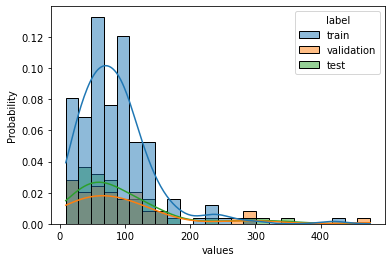

In [48]:
sns.histplot(compare,
             x = 'values',
             hue="label",
             fill = True,
             kde = True,
             stat = 'probability')

In [49]:
x1,x2 = np.around(model.predict(X_test),1),np.around(y_test,1)

Text(27.0, 309.1, 'R2 = 0.715')

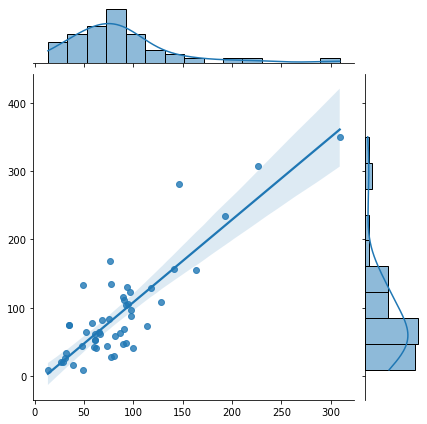

In [50]:
# figure size in inches
sns.jointplot(x=x1, y=x2, kind="reg")
plt.xlabel('Predicted',fontsize = 15)
plt.ylabel('True',fontsize = 15)
#plt.colorbar()
plt.annotate("R2 = {:.3f}".format(model.score(X_test, y_test)),(min(x1)+min(x1),max(x1)))